In [2]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [3]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rockpaperscissorsAnnisa.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [4]:
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [5]:
os.listdir('/tmp/images/train')

['rock', 'paper', 'scissors']

In [6]:
os.listdir('/tmp/images/val')
# membuat direktori rockpaperscissors pada direktori data training
#train_clean_dir = os.path.join(train_dir, 'rock')

# membuat direktori rockpaperscissors pada direktori data training
#train_messy_dir = os.path.join(train_dir, 'paper')

# membuat direktori rockpaperscissors pada direktori data training
#train_messy_dir = os.path.join(train_dir, 'scissors')

# membuat direktori rockpaperscissors pada direktori data validasi
#validation_clean_dir = os.path.join(validation_dir, 'rock')

# membuat direktori rockpaperscissors pada direktori data validasi
#validation_messy_dir = os.path.join(validation_dir, 'paper'

# membuat direktori rockpaperscissors pada direktori data validasi
#validation_messy_dir = os.path.join(validation_dir, 'scissors'

['rock', 'paper', 'scissors']

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32,
        # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=32, 
        # karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [11]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2
)

Epoch 1/20
25/25 - 52s - loss: 1.1335 - accuracy: 0.3575 - val_loss: 1.0900 - val_accuracy: 0.3438 - 52s/epoch - 2s/step
Epoch 2/20
25/25 - 52s - loss: 1.0794 - accuracy: 0.3825 - val_loss: 0.9558 - val_accuracy: 0.6375 - 52s/epoch - 2s/step
Epoch 3/20
25/25 - 49s - loss: 0.8933 - accuracy: 0.6104 - val_loss: 0.8165 - val_accuracy: 0.7250 - 49s/epoch - 2s/step
Epoch 4/20
25/25 - 49s - loss: 0.5659 - accuracy: 0.8143 - val_loss: 0.2349 - val_accuracy: 0.9062 - 49s/epoch - 2s/step
Epoch 5/20
25/25 - 50s - loss: 0.3035 - accuracy: 0.8974 - val_loss: 0.3277 - val_accuracy: 0.8750 - 50s/epoch - 2s/step
Epoch 6/20
25/25 - 48s - loss: 0.3417 - accuracy: 0.8844 - val_loss: 0.2253 - val_accuracy: 0.9000 - 48s/epoch - 2s/step
Epoch 7/20
25/25 - 50s - loss: 0.2541 - accuracy: 0.9312 - val_loss: 0.1520 - val_accuracy: 0.9312 - 50s/epoch - 2s/step
Epoch 8/20
25/25 - 50s - loss: 0.1998 - accuracy: 0.9362 - val_loss: 0.1886 - val_accuracy: 0.9312 - 50s/epoch - 2s/step
Epoch 9/20
25/25 - 50s - loss: 0

Saving tangan.jpeg to tangan.jpeg
1/1 [==============================] - 0s 37ms/step
tangan.jpeg
scissors


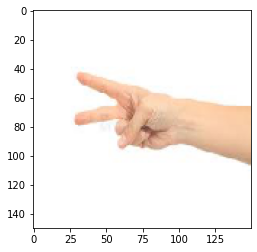

In [18]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes[0,0]!=0:
    print('scissors')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('papper')